In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [19]:
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv('Egypt_terr_augmented_with_infilation.csv')

In [20]:
# Cell 3: Convert date and create time period columns
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.year

In [21]:
# Cell 4: Check available columns
print("Available columns:", df.columns.tolist())

Available columns: ['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'nkill', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'date', 'inflation_rate', 'month', 'year']


In [22]:
# Cell 5: Identify inflation column
# Based on your output, the column is named 'inflation_rate'
inflation_column = 'inflation_rate'

print(f"Using inflation column: {inflation_column}")

# Create monthly aggregation of terrorism metrics
monthly_df = df.groupby('month').agg({
    'eventid': 'count',
    'nkill': 'sum',
    inflation_column: 'mean'
}).rename(columns={'eventid': 'attacks'}).reset_index()

monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# Create annual aggregation for Pearson correlation
yearly_df = df.groupby('year').agg({
    'eventid': 'count',
    'nkill': 'sum',
    inflation_column: 'mean'
}).rename(columns={'eventid': 'attacks'}).reset_index()

# Rename the inflation column for consistency
monthly_df = monthly_df.rename(columns={inflation_column: 'inflation'})
yearly_df = yearly_df.rename(columns={inflation_column: 'inflation'})

Using inflation column: inflation_rate


In [23]:
# Cell 6: Pearson correlation analysis (Hypothesis 4)
# 1. Correlation between inflation and attacks
corr_inflation_attacks, p_value_attacks = stats.pearsonr(yearly_df['inflation'], yearly_df['attacks'])

# 2. Correlation between inflation and fatalities
corr_inflation_fatalities, p_value_fatalities = stats.pearsonr(yearly_df['inflation'], yearly_df['nkill'])

# Print results
print("\n=== Hypothesis 4: Correlation between Inflation and Terrorism ===")
print(f"Correlation between inflation and attacks: {corr_inflation_attacks:.4f} (p-value: {p_value_attacks:.4f})")
print(f"Correlation between inflation and fatalities: {corr_inflation_fatalities:.4f} (p-value: {p_value_fatalities:.4f})")


=== Hypothesis 4: Correlation between Inflation and Terrorism ===
Correlation between inflation and attacks: 0.0511 (p-value: 0.7674)
Correlation between inflation and fatalities: 0.2257 (p-value: 0.1857)


In [24]:
# Cell 7: Interpretation
alpha = 0.05
print("\nInterpretation:")

# For attacks
if p_value_attacks < alpha:
    if corr_inflation_attacks > 0:
        print("- There is a statistically significant POSITIVE correlation between inflation and number of attacks.")
    else:
        print("- There is a statistically significant NEGATIVE correlation between inflation and number of attacks.")

    # Interpret strength
    if abs(corr_inflation_attacks) < 0.3:
        print("  The correlation is weak.")
    elif abs(corr_inflation_attacks) < 0.7:
        print("  The correlation is moderate.")
    else:
        print("  The correlation is strong.")
else:
    print("- There is NO statistically significant correlation between inflation and number of attacks.")

# For fatalities
if p_value_fatalities < alpha:
    if corr_inflation_fatalities > 0:
        print("- There is a statistically significant POSITIVE correlation between inflation and fatalities.")
    else:
        print("- There is a statistically significant NEGATIVE correlation between inflation and fatalities.")

    # Interpret strength
    if abs(corr_inflation_fatalities) < 0.3:
        print("  The correlation is weak.")
    elif abs(corr_inflation_fatalities) < 0.7:
        print("  The correlation is moderate.")
    else:
        print("  The correlation is strong.")
else:
    print("- There is NO statistically significant correlation between inflation and fatalities.")


Interpretation:
- There is NO statistically significant correlation between inflation and number of attacks.
- There is NO statistically significant correlation between inflation and fatalities.


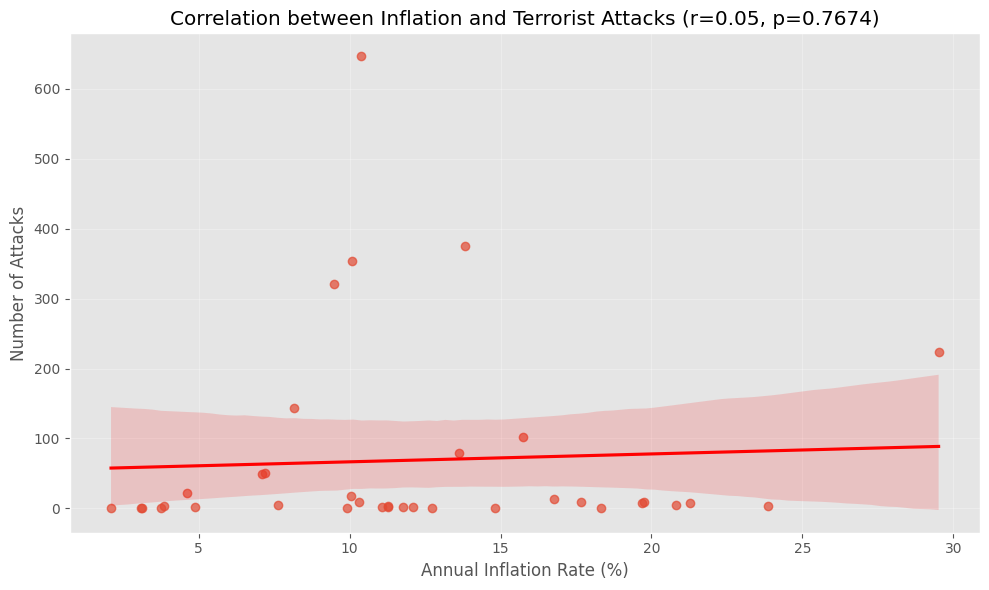

In [25]:
# Cell 8: Scatter plot with regression line for yearly data (attacks)
plt.figure(figsize=(10, 6))
sns.regplot(x='inflation', y='attacks', data=yearly_df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title(f'Correlation between Inflation and Terrorist Attacks (r={corr_inflation_attacks:.2f}, p={p_value_attacks:.4f})')
plt.xlabel('Annual Inflation Rate (%)')
plt.ylabel('Number of Attacks')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

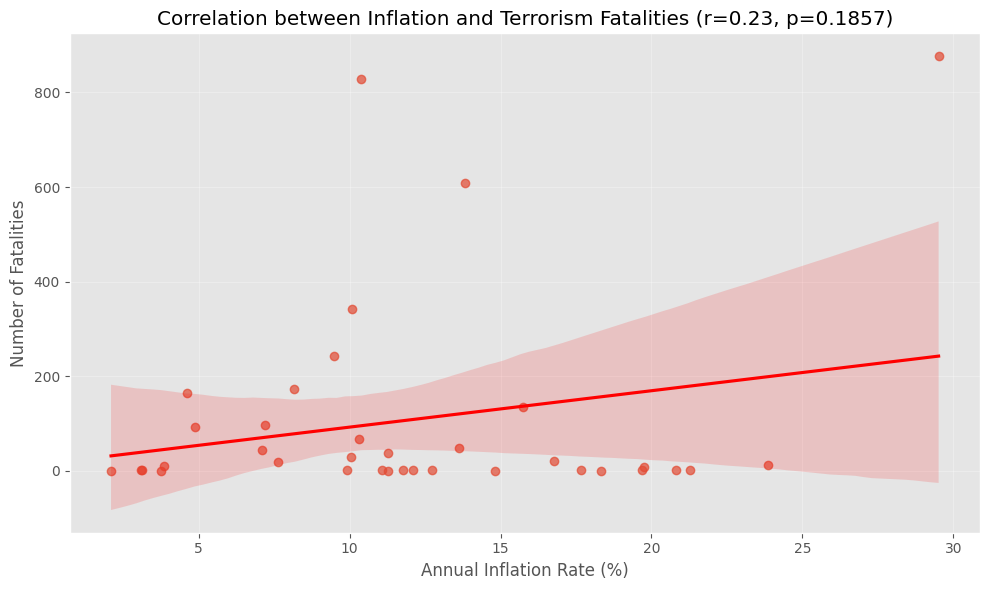

In [26]:
# Cell 9: Scatter plot with regression line for yearly data (fatalities)
plt.figure(figsize=(10, 6))
sns.regplot(x='inflation', y='nkill', data=yearly_df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title(f'Correlation between Inflation and Terrorism Fatalities (r={corr_inflation_fatalities:.2f}, p={p_value_fatalities:.4f})')
plt.xlabel('Annual Inflation Rate (%)')
plt.ylabel('Number of Fatalities')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

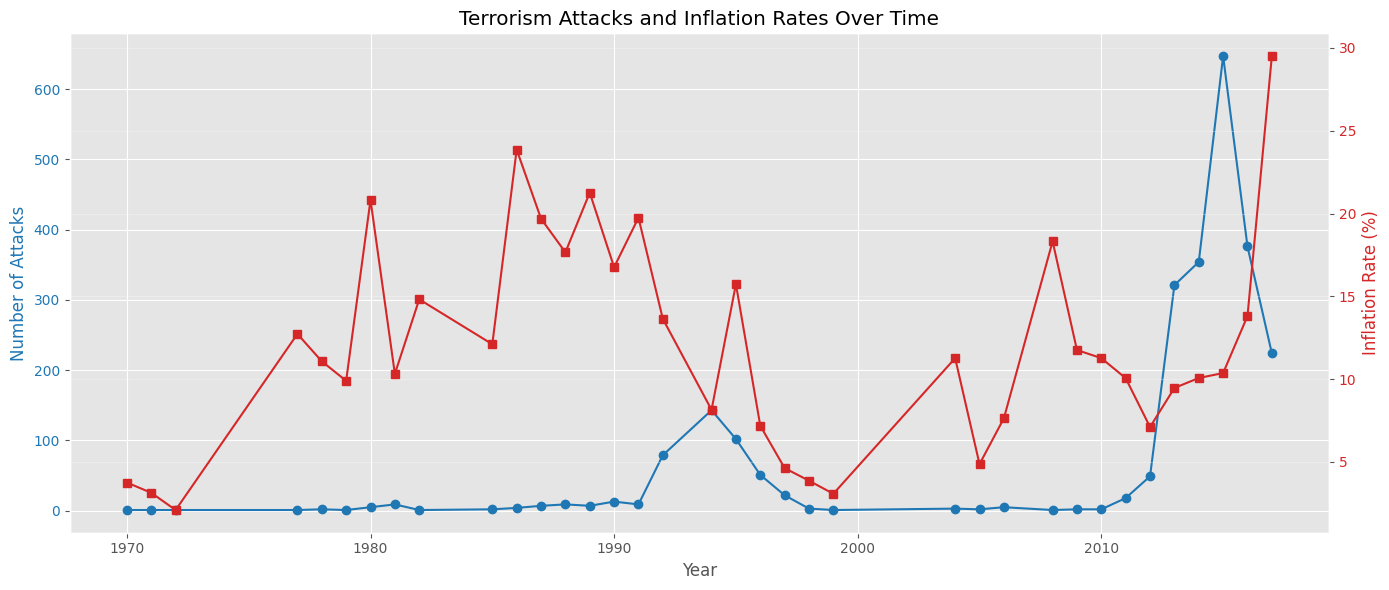

In [27]:
# Cell 10: Time series plot showing both inflation and terrorism metrics
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Attacks', color=color)
ax1.plot(yearly_df['year'], yearly_df['attacks'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Inflation Rate (%)', color=color)
ax2.plot(yearly_df['year'], yearly_df['inflation'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Terrorism Attacks and Inflation Rates Over Time')
fig.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

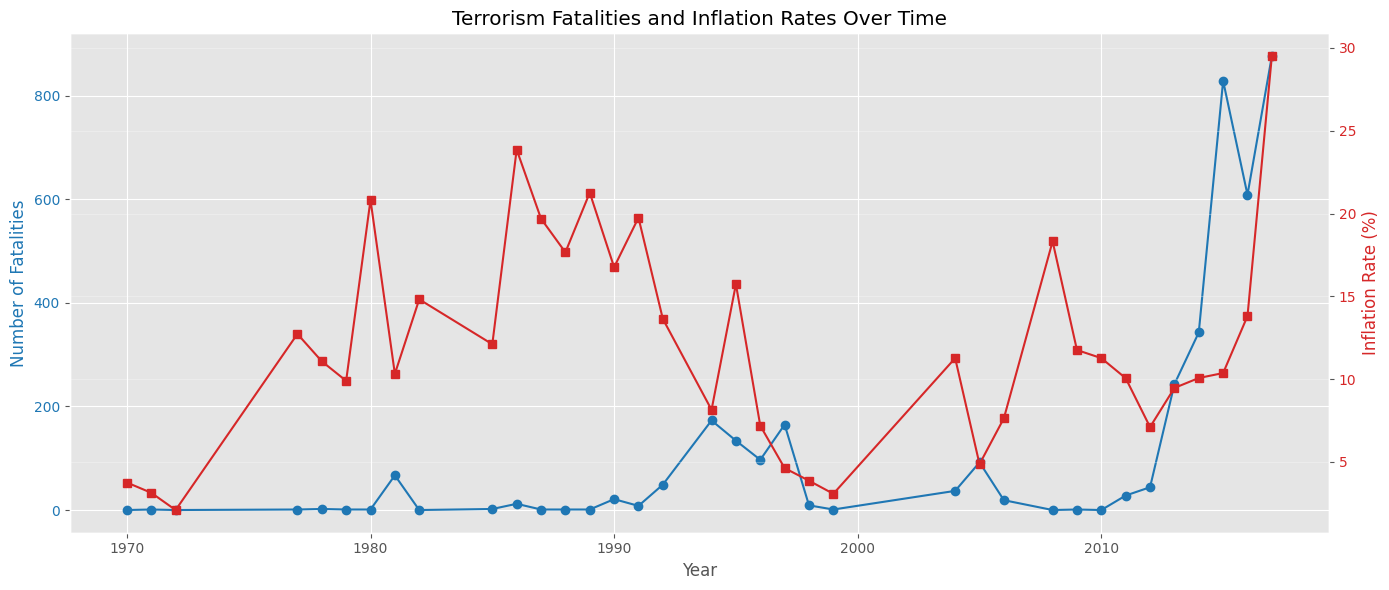

In [28]:
# Cell 11: Time series plot showing both inflation and fatalities
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatalities', color=color)
ax1.plot(yearly_df['year'], yearly_df['nkill'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Inflation Rate (%)', color=color)
ax2.plot(yearly_df['year'], yearly_df['inflation'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Terrorism Fatalities and Inflation Rates Over Time')
fig.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

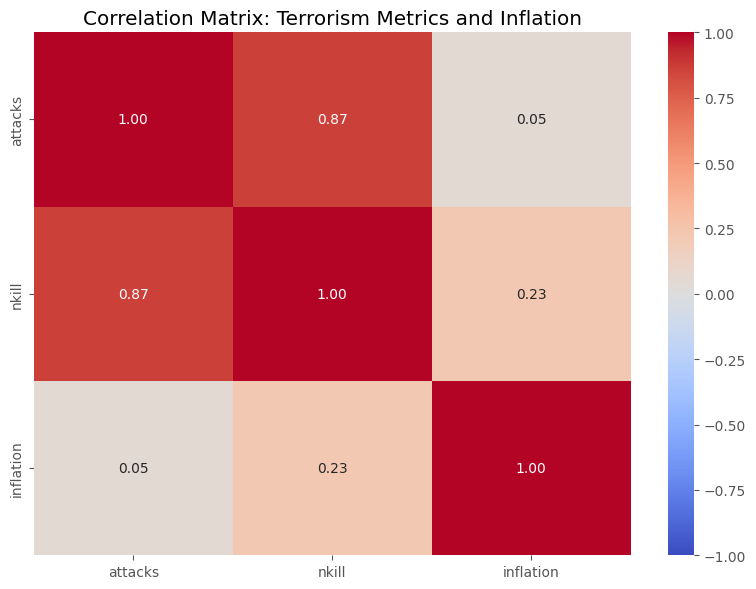

In [29]:
# Cell 12: Heatmap of correlation matrix
correlation_vars = ['attacks', 'nkill', 'inflation']
correlation_matrix = yearly_df[correlation_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: Terrorism Metrics and Inflation')
plt.tight_layout()
plt.show()

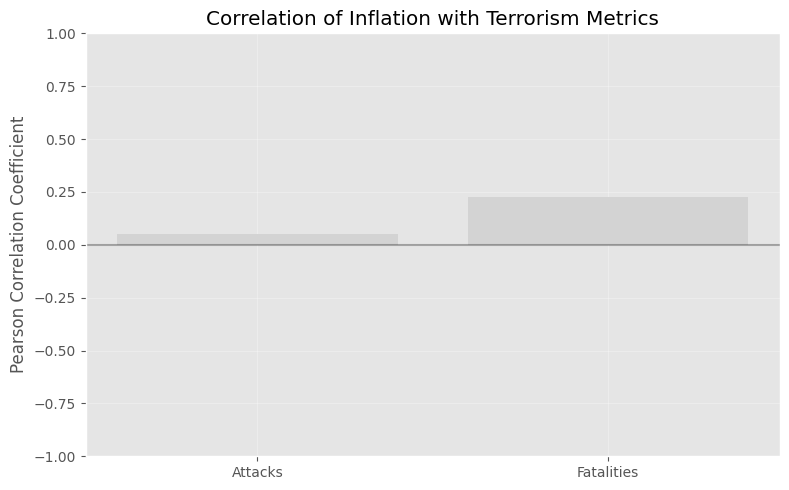

In [32]:
# Cell 13: Bar chart showing correlation coefficients
plt.figure(figsize=(8, 5))
correlations = [corr_inflation_attacks, corr_inflation_fatalities]
labels = ['Attacks', 'Fatalities']
colors = ['blue' if p < 0.05 else 'lightgray' for p in [p_value_attacks, p_value_fatalities]]

bars = plt.bar(labels, correlations, color=colors)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Correlation of Inflation with Terrorism Metrics')
plt.ylabel('Pearson Correlation Coefficient')
plt.ylim(-1, 1)

# Add significance indicators
for i, p in enumerate([p_value_attacks, p_value_fatalities]):
    if p < 0.001:
        plt.text(i, correlations[i] + 0.05, '***', ha='center')
    elif p < 0.01:
        plt.text(i, correlations[i] + 0.05, '**', ha='center')
    elif p < 0.05:
        plt.text(i, correlations[i] + 0.05, '*', ha='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()